### 1- imports

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# utils
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 

### 2- load data

In [106]:
data=pd.read_csv('Travel_details_dataset.csv')

### 3- data exploratory 

In [107]:
data.tail()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500
138,139,"Auckland, New Zealand",10/1/2023,10/8/2023,7.0,William Brown,39.0,Male,New Zealander,Hotel,7000,Train,2500


In [108]:
data.describe()

,Trip ID,Duration (days),Traveler age
count,139.000000,137.000000,137.000000
mean,70.000000,7.605839,33.175182
std,40.269923,1.601276,7.145441
min,1.000000,5.000000,20.000000
25%,35.500000,7.000000,28.000000
50%,70.000000,7.000000,31.000000
75%,104.500000,8.000000,38.000000
max,139.000000,14.000000,60.000000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


### 3-preprocessing   

In [110]:
data = data.dropna() # drop nulls
data = data.drop(['Trip ID','Traveler name','Start date','End date','Duration (days)'], axis=1) # drop unnecessary cols

#### Label Encoding

In [111]:
label_encoder = preprocessing.LabelEncoder() 
data['Destination']= label_encoder.fit_transform(data['Destination']) 
data['Traveler gender']= label_encoder.fit_transform(data['Traveler gender']) 
data['Traveler nationality']= label_encoder.fit_transform(data['Traveler nationality']) 
data['Accommodation type']= label_encoder.fit_transform(data['Accommodation type']) 
data['Accommodation cost']= label_encoder.fit_transform(data['Accommodation cost']) 
data['Transportation type']= label_encoder.fit_transform(data['Transportation type']) 
data['Transportation cost']= label_encoder.fit_transform(data['Transportation cost']) 

#### Diagrams

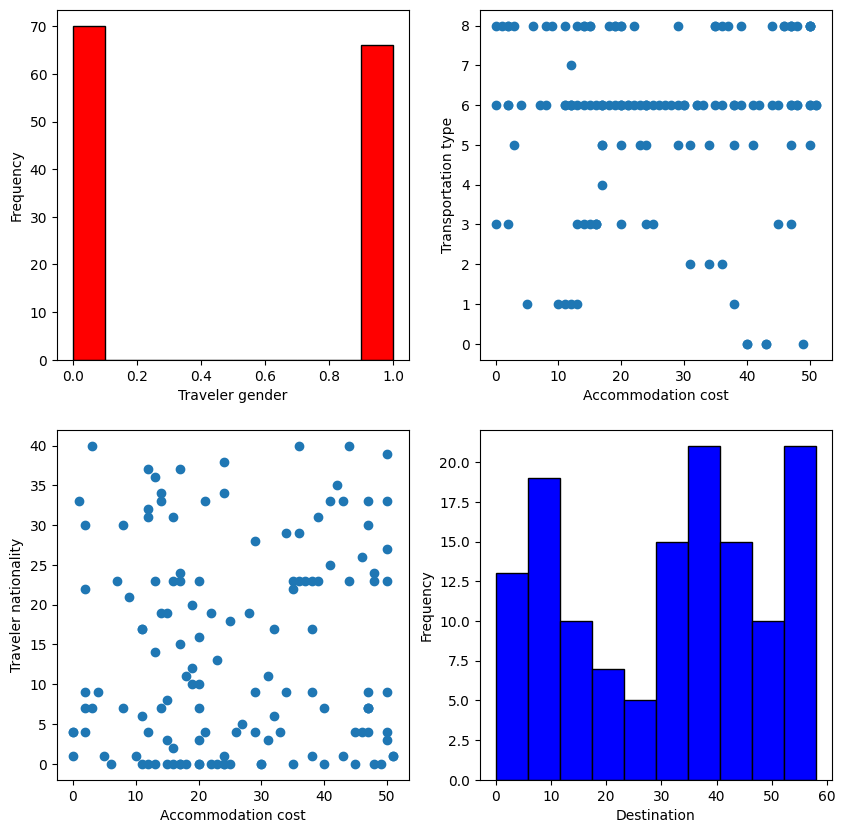

In [112]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(data["Traveler gender"],10,fc="red",ec="black")
ax[0,0].set_xlabel("Traveler gender")
ax[0,0].set_ylabel("Frequency")
ax[0,1].scatter(data["Accommodation cost"],data["Transportation type"])
ax[0,1].set_xlabel("Accommodation cost")
ax[0,1].set_ylabel("Transportation type")
ax[1,0].scatter(data["Accommodation cost"],data["Traveler nationality"])
ax[1,0].set_xlabel("Accommodation cost")
ax[1,0].set_ylabel("Traveler nationality")
ax[1,1].hist(data["Destination"],10,fc="blue",ec="black")
ax[1,1].set_xlabel("Destination")
ax[1,1].set_ylabel("Frequency")
plt.show()

### 4- Features and labels

In [114]:
feature_cols=['Destination', 'Traveler age','Traveler nationality','Accommodation type','Accommodation cost', 'Transportation type','Transportation cost']
X=data[feature_cols]
Y=data['Traveler gender']

### 5- Splitting data

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) 

### 6- Model selection

In [116]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=2)
# clf_gini=DecisionTreeClassifier(criterion="gini",max_depth=5)
# RFC=RandomForestClassifier(n_estimators=100, random_state=1)
# GNB=GaussianNB()
# svclassifier=SVC(gamma="auto",kernel="rbf")

### 7- Model training 

In [117]:
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
# clf_gini=clf_gini.fit(X_train,Y_train)
# Y_pred=clf_gini.predict(X_test)
# RFC.fit(X_train,Y_train)
# Y_pred=RFC.predict(X_test)
# GNB.fit(X_train,Y_train)
# Y_pred=GNB.predict(X_test)
# svclassifier.fit(X_train,Y_train)
# Y_pred=svclassifier.predict(X_test)

### 8- Model evaluation

In [118]:
"DC Entropy Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2) # 073
# "DC Gini Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.66
# "Random Forest Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.63
# "GaussianNB Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.61
# "SVC rbf kernel Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.37
# "SVC linear kernel Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.66
# "SVC poly kernel Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.61
# "SVC sigmoid kernel Accuracy:",round(metrics.accuracy_score(Y_test,Y_pred),2)  # 0.39

('DC Entropy Accuracy:', 0.73)

### 9 - Model adjustment